In [1]:
!pip install pyjanitor pyvis --quiet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

df_ori = pd.read_csv("/users/annagaleano/downloads/Connections.csv", skiprows=2)
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     217 non-null    object
 1   Last Name      217 non-null    object
 2   Email Address  1 non-null      object
 3   Company        212 non-null    object
 4   Position       213 non-null    object
 5   Connected On   221 non-null    object
dtypes: object(6)
memory usage: 10.5+ KB


In [3]:
df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )
df.head()

,company,position,connected_on
0,CACI International Inc,Counter-Unmanned Aerial Systems Integrator,2022-12-23
1,University of Arkansas System Cooperative Exte...,Assistant Director - Information Technology,2022-11-03
2,The Honor Foundation,Vice President of People,2022-11-02
3,U.S. Africa Command (AFRICOM),Project Director,2022-11-02
4,Government of Canada,Counsellor - Canadian Embassy to Finland,2022-11-02


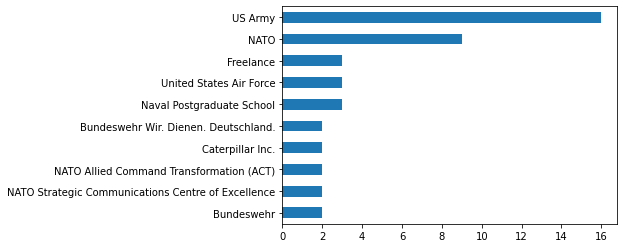

In [5]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

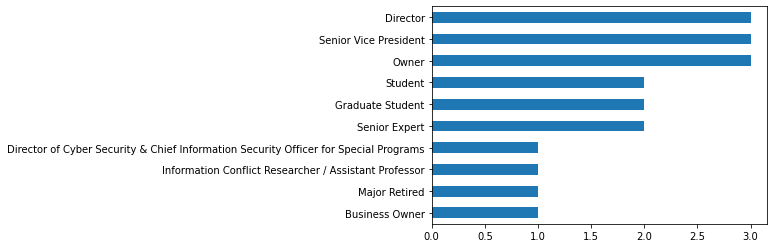

In [6]:
df['position'].value_counts().head(10).plot(kind="barh").invert_yaxis();

,company,count
0,US Army,16
1,NATO,9
2,Freelance,3
3,United States Air Force,3
4,Naval Postgraduate School,3
9,Bundeswehr,2
12,BlueHalo,2
10,Research Innovations Incorporated,2
11,U.S. Naval War College,2
8,NATO Strategic Communications Centre of Excell...,2


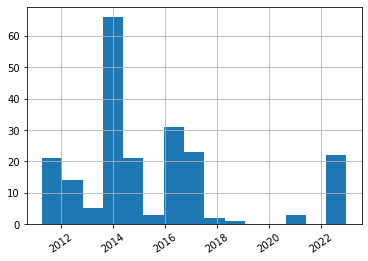

In [4]:
df['connected_on'].hist(xrot=35, bins=15);
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)

In [5]:
nt = net.Network(notebook=True)

g = nx.Graph()
g.add_node(0, label = "root") # intialize yourself as central node
g.add_node(1, label = "Company 1", size=10, title="info1")
g.add_node(2, label = "Company 2", size=40, title="info2")
g.add_node(3, label = "Company 3", size=60, title="info3")
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)

nt.from_nx(g)
nt.show('nodes.html')
display(HTML('nodes.html')

SyntaxError: unexpected EOF while parsing (2643940525.py, line 14)